In [ ]:
import pandas as pd
import numpy as np

# 1. VERİYİ YÜKLE
df = pd.read_parquet("eda_data.parquet")

print(f"Orjinal veri boyutu: {df.shape}")

# 2. TARGET OLUŞTUR
def categorize_owners(owner_range):
    """
    Estimated owners aralığını 3 kategoriye ayırır
    Low: 0 - 20000
    Medium: 20000 - 50000
    High: 50000+
    """
    if pd.isna(owner_range):
        return None
    
    owner_str = str(owner_range).strip()
    
    # Düşük popülerlik
    if owner_str in ['0 - 0', '0 - 20000']:
        return 0  # Low
    
    # Orta popülerlik
    elif owner_str == '20000 - 50000':
        return 1  # Medium
    
    # Yüksek popülerlik (50000'den büyük her şey)
    else:
        try:
            lower_bound = int(owner_str.split(' - ')[0])
            if lower_bound >= 50000:
                return 2  # High
            else:
                return 1  # Medium
        except:
            return None

# Target kolonunu oluştur
df['target'] = df['Estimated owners'].apply(categorize_owners)

# Missing değerleri kontrol et
print(f"\nTarget missing değer sayısı: {df['target'].isna().sum()}")

# Missing varsa temizle
df_final = df[df['target'].notna()].copy()

print(f"\nTemizlenmiş veri boyutu: {df_final.shape}")

# Dağılımı kontrol et
print("\n=== TARGET DAĞILIMI ===")
print(df_final['target'].value_counts().sort_index())
print(f"\nYüzdeler:")
print(df_final['target'].value_counts(normalize=True).sort_index() * 100)

# Mapping bilgisi
print("\n=== TARGET KODLAMA ===")
print("0 = Low (0-20000)")
print("1 = Medium (20000-50000)")
print("2 = High (50000+)")

# 3. KAYDEDİLECEK VERİYİ HAZIRLA
# Estimated owners kolonunu çıkar (artık target var)
df_final = df_final.drop(columns=['Estimated owners','Estimated owners numeric'], errors='ignore')

print(f"\n Final veri kolonları: {df_final.shape[1]}")
print(f" Final veri satırları: {df_final.shape[0]}")

# 4. KAYDET
output_filename = "target2_data.parquet"
df_final.to_parquet(output_filename, index=False)

print(f"\n VERİ KAYDEDİLDİ: '{output_filename}'")
print(f"\nKullanım:")
print(f"  df = pd.read_parquet('{output_filename}')")
print(f"  X = df.drop(columns=['target'])")
print(f"  y = df['target']")

# Özet bilgi
print("\n" + "="*60)
print("ÖZET BİLGİ")
print("="*60)
print(f"Toplam satır: {len(df_final)}")
print(f"Toplam kolon: {len(df_final.columns)}")
print(f"Target kolon: 'target'")
print(f"  - 0 (Low):    {(df_final['target']==0).sum():,} örneg")
print(f"  - 1 (Medium): {(df_final['target']==1).sum():,} örnek")
print(f"  - 2 (High):   {(df_final['target']==2).sum():,} örnek")
print("="*60)

Orjinal veri boyutu: (61432, 43)

Target missing değer sayısı: 0

Temizlenmiş veri boyutu: (61432, 44)

=== TARGET DAĞILIMI ===
target
0    45099
1     7753
2     8580
Name: count, dtype: int64

Yüzdeler:
target
0    73.412879
1    12.620458
2    13.966662
Name: proportion, dtype: float64

=== TARGET KODLAMA ===
0 = Low (0-20000)
1 = Medium (20000-50000)
2 = High (50000+)

 Final veri kolonları: 42
 Final veri satırları: 61432

🎉 VERİ KAYDEDİLDİ: 'target2_data.parquet'

Kullanım:
  df = pd.read_parquet('target2_data.parquet')
  X = df.drop(columns=['target'])
  y = df['target']

ÖZET BİLGİ
Toplam satır: 61432
Toplam kolon: 42
Target kolon: 'target'
  - 0 (Low):    45,099 örneg
  - 1 (Medium): 7,753 örnek
  - 2 (High):   8,580 örnek



 Grafik kaydedildi: target_distribution.png


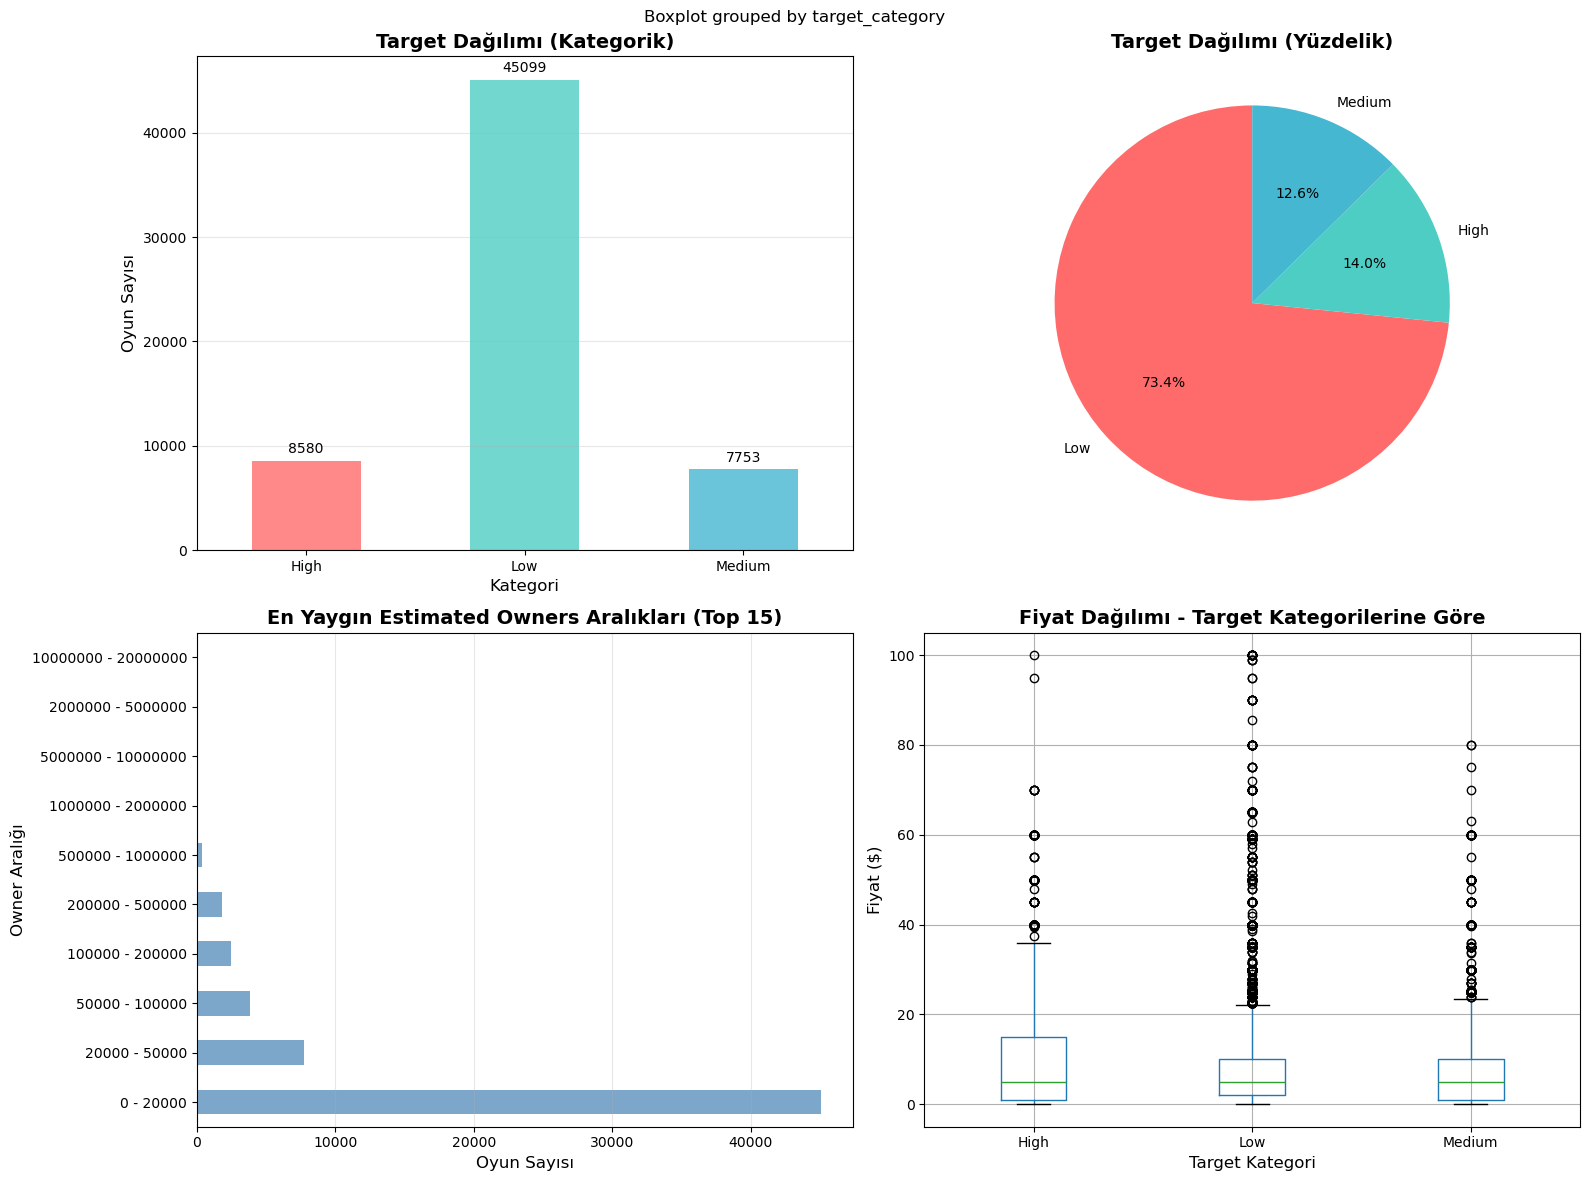


TARGET İSTATİSTİKLERİ

Toplam veri sayısı: 61,432
Temiz veri sayısı: 61,432

Kategori dağılımı:
  Low     : 45,099 (73.41%)
  Medium  :  7,753 (12.62%)
  High    :  8,580 (13.97%)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirmeler
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Target Dağılımı - Bar Chart
y_categorical.value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
axes[0, 0].set_title('Target Dağılımı (Kategorik)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Kategori', fontsize=12)
axes[0, 0].set_ylabel('Oyun Sayısı', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=0)

# Değerleri çubukların üzerine yaz
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt='%d', padding=3)

# 2. Target Dağılımı - Pie Chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
y_categorical.value_counts().plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%', 
                                   colors=colors, startangle=90)
axes[0, 1].set_title('Target Dağılımı (Yüzdelik)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('')

# 3. Estimated Owners Dağılımı
owner_counts = df['Estimated owners'].value_counts().head(15)
owner_counts.plot(kind='barh', ax=axes[1, 0], color='steelblue', alpha=0.7)
axes[1, 0].set_title('En Yaygın Estimated Owners Aralıkları (Top 15)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Oyun Sayısı', fontsize=12)
axes[1, 0].set_ylabel('Owner Aralığı', fontsize=12)
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Target'a göre sayısal özelliklerin dağılımı (örnek: Price)
if 'Price' in df_clean.columns:
    df_clean_with_target = df_clean.copy()
    df_clean_with_target['target_category'] = y_categorical[y.notna()]
    
    df_clean_with_target.boxplot(column='Price', by='target_category', ax=axes[1, 1])
    axes[1, 1].set_title('Fiyat Dağılımı - Target Kategorilerine Göre', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Target Kategori', fontsize=12)
    axes[1, 1].set_ylabel('Fiyat ($)', fontsize=12)
    plt.sca(axes[1, 1])
    plt.xticks(rotation=0)
else:
    # Alternatif: Target kategorilerine göre Achievements
    if 'Achievements' in df_clean.columns:
        df_clean_with_target = df_clean.copy()
        df_clean_with_target['target_category'] = y_categorical[y.notna()]
        
        df_clean_with_target.boxplot(column='Achievements', by='target_category', ax=axes[1, 1])
        axes[1, 1].set_title('Achievements Dağılımı - Target Kategorilerine Göre', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Target Kategori', fontsize=12)
        axes[1, 1].set_ylabel('Achievements Sayısı', fontsize=12)

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
print("\n Grafik kaydedildi: target_distribution.png")
plt.show()

# Ek: Korelasyon Analizi
print("\n" + "="*70)
print("TARGET İSTATİSTİKLERİ")
print("="*70)
print(f"\nToplam veri sayısı: {len(df):,}")
print(f"Temiz veri sayısı: {len(df_clean):,}")
print(f"\nKategori dağılımı:")
for cat in ['Low', 'Medium', 'High']:
    count = (y_categorical == cat).sum()
    pct = count / len(y_categorical) * 100
    print(f"  {cat:8s}: {count:6,} ({pct:5.2f}%)")